## Abrindo o arquivo de dados

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [6]:
df = pd.read_csv('~/Desktop/desafio_kognita/_data/dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8')

In [68]:
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


## Limpeza da base

In [7]:
df['tipo_sociedade'].unique()

array(['empresario (individual)', 'sociedade empresaria limitada',
       'empresa individual respons limitada empresaria',
       'empresario-mei(microempreendedor individual)',
       'sociedade anonima fechada', 'missing', 'cooperativa',
       'sociedade de economia mista', 'fundacao privada',
       'outras formas de associacao', 'sociedade anonima aberta',
       'sociedade simples pura', 'sociedade simples limitada',
       'organizacao religiosa', 'servico social autonomo', 'municipio',
       'entidade sindical'], dtype=object)

In [8]:
df['opcao_tributaria'].unique()

array(['simples nacional', 'missing', 'lucro real', 'lucro presumido',
       'isento'], dtype=object)

In [9]:
df['atividade_principal'].unique()

array(['papelaria', 'com de equipamentos de informatica',
       'servicos de vigilancia e guarda',
       'com de compon eletron e pecas para eletrod',
       'farmacia e drogaria', 'bazar, armarinho e miudezas em geral',
       'com de livros, revistas e jornais', 'com de moveis e estofados',
       'com de brinquedos', 'servicos de telefonia fixa', 'comercio',
       'com de confeccoes em geral', 'servicos',
       'com de telefones e equip p/ comunicacoes',
       'repar/ manut de equip indls e de comunicacao', 'missing',
       'com de eletrodomesticos', 'com de auto pecas e acessorios',
       'com de motocicletas, pecas e acessorios', 'loja de departamentos',
       'com atac-prod farmac, perfumaria, cosmeticos',
       'provedor de acesso a rede de computadores',
       'com de instrumentos e materiais para uso med',
       'com de tratores e implementos agricolas',
       'com de artigos ortopedicos',
       'com de maquinas e equip para escritorio', 'com de bebidas',
       '

In [10]:
df['forma_pagamento'].unique()

array(['30/60/90', 'missing', '28 dias', '30/45', '60/90/120',
       '30/60/90/120', '30 dias', '35/49/63/77/91', '120', '28/56/84',
       '28/42/56', '28/35/42 dd', '30/60', '60/90/120/150/180/210',
       '42/49/56/63/70', '21/28/35/42/49/56/63', '120/150/180',
       '30/60/90/120/150', '42 dias', '21/29/35 dd', '21/28/35/42/49',
       'boleto 7 dias', '49/56/63', '30/45/60', '14/28/42', '14',
       '28/42/56/70/84/98/112', '28/56', '55/62/69/76/83/90/97',
       '10/40/70', '28/42 dd', '40,70,100,130', '28/42/56/70/84',
       '60 dias', '21', '28/35/42/49/56', '35/42/49/56/63', '42/49/56',
       '90/120/150', 'boleto14/21/28/35/42', '10', '30/45/60/75/90',
       '35/42/49', '12 vezes, 1a, 30dd', '10x,1a. 30dd', '14/28/42/56/70',
       '140 dias', '14/28', '30/45/60/75/90/105/120', '60/90',
       '27/34/41/48/55/62/69', '56 dias', '80 dias', '42/56/70',
       'boleto 14 dias', '75', 'boleto 28 dias', '20/40/60/80/100',
       '35 dd', '35/49', '30/60/90/120/150/180/210/240

In [11]:
df_drop_objetos = df.drop(['forma_pagamento', 'atividade_principal', 'opcao_tributaria', 'tipo_sociedade'], axis=1)

In [12]:
df_drop_objetos.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,0.0,0.0,0,0,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,0.0,0.0,0,0,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,0.0,0.0,0,0,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,0.0,0.0,0,0,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,0.0,0.0,0,0,2655.505663,10,2017,0


In [13]:
df_drop_objetos.describe()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
count,117273.000000,117273.000000,117273.000000,1.172730e+05,1.172730e+05,1.172730e+05,117273.000000,1.172730e+05,117273.000000,1.172730e+05,117273.0,1.172730e+05,117273.000000,117273.000000,1.172730e+05,117273.000000,117273.000000,117273.000000
mean,0.148721,55.582906,17.106291,6.421384e+04,2.454043e+03,1.085557e+06,0.240456,2.051017e+03,0.018922,9.218511e+02,0.0,5.603808e+02,0.014974,0.000622,2.406180e+04,6.279169,2017.976798,0.166662
std,0.853794,60.989240,10.993605,5.252546e+05,8.093313e+04,7.444825e+06,10.707825,8.831758e+04,0.534034,4.861025e+04,0.0,8.459291e+04,0.397264,0.030759,4.906680e+05,3.194997,0.742185,0.372676
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,-7.446899e+02,1.000000,2017.000000,0.000000
25%,0.000000,20.166667,11.121543,5.657400e+02,0.000000e+00,1.944250e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,2.140419e+03,3.000000,2017.000000,0.000000
50%,0.000000,38.000000,16.000000,4.451740e+03,0.000000e+00,8.134878e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,4.012731e+03,7.000000,2018.000000,0.000000
75%,0.000000,69.750000,18.248850,2.006296e+04,0.000000e+00,3.322643e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,9.645923e+03,9.000000,2019.000000,0.000000
max,26.000000,951.000000,90.000000,7.219759e+07,1.315050e+07,4.603203e+08,2324.000000,1.630546e+07,80.000000,8.390986e+06,0.0,1.972251e+07,40.000000,2.000000,1.503340e+08,12.000000,2019.000000,1.000000


In [14]:
corr_matrix = df_drop_objetos.corr()
(corr_matrix.style.background_gradient(cmap='Greens', axis=None))

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
default_3months,1.000000,-0.075619,-0.076480,0.027441,0.007801,0.017593,0.019165,0.015839,-0.003254,-0.003219,nan,-0.001110,-0.004177,-0.003525,-0.001352,-0.036273,0.027959,0.221207
ioi_36months,-0.075619,1.000000,0.102725,-0.071111,-0.018787,-0.089667,-0.005921,-0.010368,-0.012944,-0.008454,nan,0.002877,-0.009869,-0.010774,-0.011739,0.013182,0.064021,0.049437
ioi_3months,-0.076480,0.102725,1.000000,-0.081404,-0.021778,-0.098476,-0.008792,-0.011437,-0.018999,-0.012632,nan,-0.001332,-0.013788,-0.002463,-0.014965,0.076976,0.043292,0.004692
valor_por_vencer,0.027441,-0.071111,-0.081404,1.000000,0.648538,0.776372,0.049219,0.064702,0.278948,0.169179,nan,0.158321,0.174406,0.000932,0.064616,-0.006621,-0.017736,-0.023777
valor_vencido,0.007801,-0.018787,-0.021778,0.648538,1.000000,0.516685,0.035051,0.054827,0.136905,0.150716,nan,0.066330,0.111832,0.001002,0.018239,-0.006639,-0.014874,-0.006401
valor_quitado,0.017593,-0.089667,-0.098476,0.776372,0.516685,1.000000,0.053542,0.068094,0.319622,0.177936,nan,0.153009,0.171415,0.001701,0.059506,-0.029219,-0.023327,-0.036228
quant_protestos,0.019165,-0.005921,-0.008792,0.049219,0.035051,0.053542,1.000000,0.563431,0.221102,0.382113,nan,0.048268,0.248005,0.070380,0.002229,-0.014863,0.003263,0.001900
valor_protestos,0.015839,-0.010368,-0.011437,0.064702,0.054827,0.068094,0.563431,1.000000,0.528555,0.574293,nan,0.077167,0.453837,0.018335,0.002552,-0.018695,0.007624,0.001198
quant_acao_judicial,-0.003254,-0.012944,-0.018999,0.278948,0.136905,0.319622,0.221102,0.528555,1.000000,0.708334,nan,0.515823,0.638950,-0.000717,0.008933,-0.012397,-0.004701,-0.011989
acao_judicial_valor,-0.003219,-0.008454,-0.012632,0.169179,0.150716,0.177936,0.382113,0.574293,0.708334,1.000000,nan,0.265400,0.484621,-0.000384,0.001053,-0.014663,-0.002302,-0.008127


In [15]:
df_drop_objetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

In [16]:
base_limpa = df_drop_objetos

In [17]:
base_limpa['default'].value_counts()

0    97728
1    19545
Name: default, dtype: int64

## Separando as bases de treino e teste

In [90]:
y = base_limpa['default']

In [91]:
X = base_limpa[['valor_quitado', 'valor_por_vencer', 'valor_vencido']]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinando o modelo

In [108]:
modelo = RandomForestClassifier(n_estimators=1000,
                               bootstrap=True,
                               max_features='sqrt')

In [109]:
modelo.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

## Realizando os predicts

In [112]:
predict_treino = modelo.predict(X_train)
predict_probab = modelo.predict_proba(X_train)[:, 1]

predicts = modelo.predict(X_test)
probab = modelo.predict_proba(X_test)[: ,1]

## Analisando o modelo

### Curva ROC

In [113]:
valor_roc = roc_auc_score(y_test, probab)

In [114]:
valor_roc.round(2)

0.77

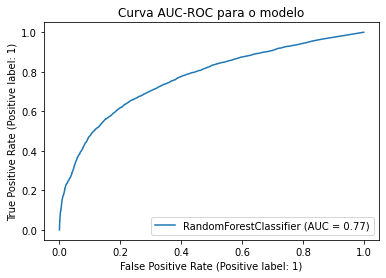

<Figure size 504x504 with 0 Axes>

In [115]:
metrics.plot_roc_curve(modelo, X_test, y_test)
plt.title('Curva AUC-ROC para o modelo')
plt.figure(figsize=(7,7))
plt.show()

## Matriz de confusão

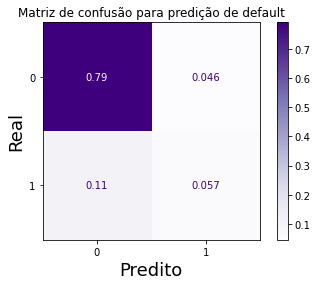

In [122]:
# Criando visualização da matriz de confusão
plot_confusion_matrix(modelo, X_test, y_test, cmap='Purples', normalize='all') 
plt.ylabel('Real', size = 18)
plt.xlabel('Predito', size = 18)
plt.title('Matriz de confusão para predição de default')
plt.show()

***********

## Simulando uma predição

In [118]:
valor_quitado = 4.000861e+04
valor_por_vencer = 19281.291534
valor_vencido = 0.0
entrada = [[valor_quitado, valor_por_vencer, valor_vencido]]

def simulador(entrada):
    if modelo.predict(entrada)[0] == 0:
        print('Default: {}, bom pagador.'.format(modelo.predict(entrada)[0]))
    else:
        print('Default: {}, mau pagador.'.format(modelo.predict(entrada)[0]))

In [119]:
simulador(entrada)

Default: 1, mau pagador.


## Exportando o modelo

In [121]:
output = open('modelo_credit_score', 'wb')
pickle.dump(modelo, output)
output.close()

## Conclusões

O modelo mostrou um bom desempenho na avaliação da curva ROC (próximo de 1) e também bom desempenho na predição de verdadeiros positivos. Em razão disso, é possível que exista uma situação de overfitting do modelo com a base. 

********